In [1]:
import matplotlib.pyplot as plt
import numpy as np


# Read data from file
with open("./Decomp_Hists_31bin_07_04_Dict_7.5A.out") as f:
    lines = f.readlines()


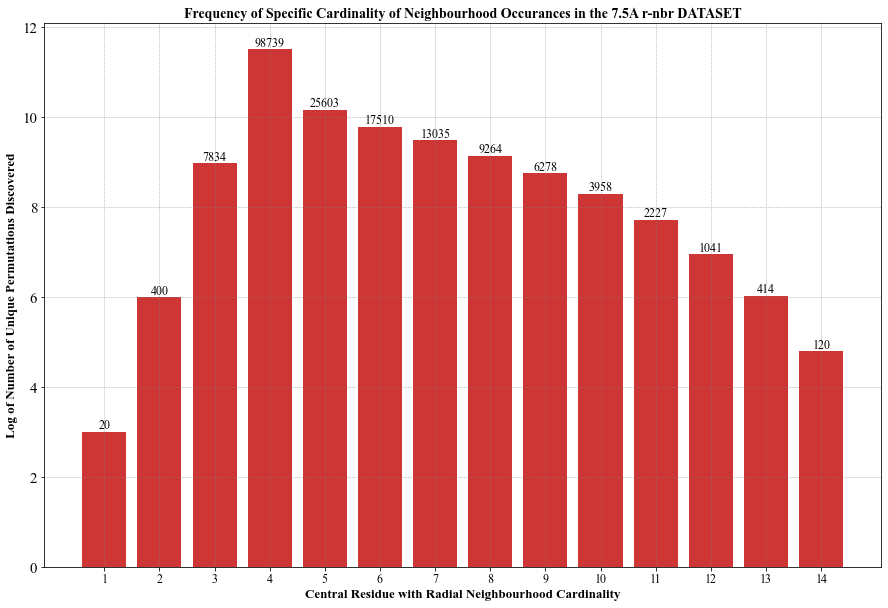

In [2]:
# from brokenaxes import brokenaxes
plt.rcParams['font.family'] = 'Times New Roman'
# Extract the number of keys with each length
key_counts = {}
for line in lines:
    if line.startswith("Number of keys with length"):
        key_len = int(line.split(":")[0].split()[-1])
        count = int(line.split(":")[-1].strip())
        key_counts[key_len] = count

x=[]
for i in key_counts.keys():
    x.append(i)

y=[]
for i in key_counts.values():
    y.append(np.log(int(i)))

# Create plot
fig, ax = plt.subplots(figsize=(15, 10))
# bars = ax.bar(key_counts.keys(), key_counts.values())
bars = ax.bar(np.array(x), np.array(y),color='#c20404',alpha=0.8)
ax.set_xlabel("Central Residue with Radial Neighbourhood Cardinality", fontsize=13,fontweight='bold')
ax.set_ylabel("Log of Number of Unique Permutations Discovered", fontsize=13,fontweight='bold')
ax.set_title("Frequency of Specific Cardinality of Neighbourhood Occurances in the 7.5A r-nbr DATASET", fontsize=14,fontweight='bold')
labels = list(key_counts.keys())
ax.set_xticks([i for i in key_counts.keys()])
ax.set_xticklabels(labels, fontsize=19)
# ax.set_yticks(np.arange(11))
ax.tick_params(axis='y', labelsize=15)
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7, zorder=0) 

ax.tick_params(axis='x', labelsize=12)
# Add y-values as text on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(int(np.exp(height))+1), ha='center', va='bottom', fontsize=12)
plt.savefig('./7.5A_out.png',dpi=400, bbox_inches='tight')
plt.show()


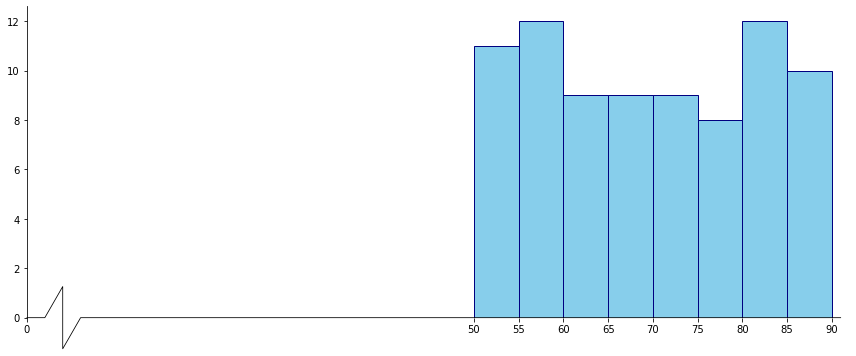

In [27]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randint(50, 89, 80)
bins = np.arange(50, data.max()+6, 5)
fig, ax = plt.subplots(figsize=(12,5))

ax.hist(data, bins=bins, fc='skyblue', ec='navy')
false_zero = bins[0] - 10
ax.set_xticks(np.append(false_zero, bins))
ax.set_xticklabels(np.append(0, bins))

for spine in ['top', 'right', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.add_line(plt.Line2D(xdata=[false_zero, false_zero + 2, false_zero + 4, false_zero + 4, false_zero + 6, bins[-1] + 1],
                       ydata=[0, 0, 0.1, -0.1, 0, 0],
                       color=ax.spines['bottom'].get_edgecolor(), lw=ax.spines['bottom'].get_linewidth(),
                       clip_on=False, transform=ax.get_xaxis_transform()))
plt.tight_layout()
plt.show()

C:\Users\KRITIK~1\AppData\Local\Temp/ipykernel_32112/153330121.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


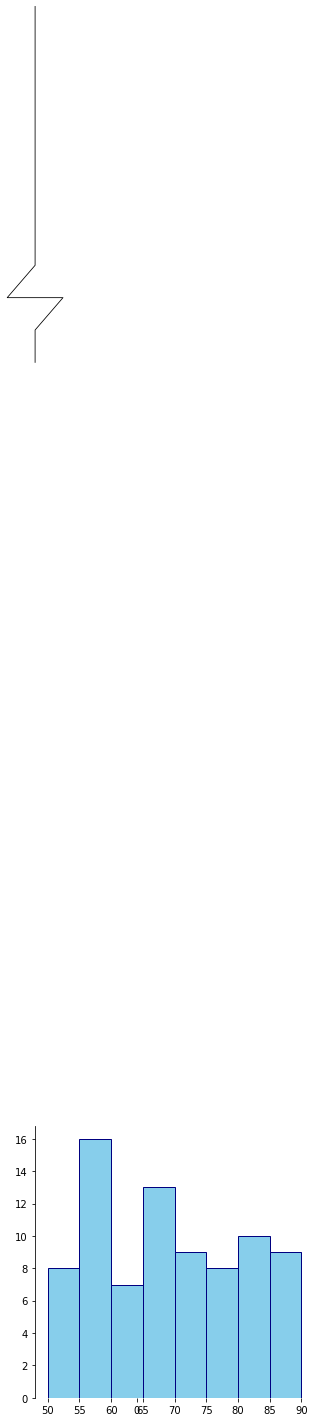

In [36]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randint(50, 89, 80)
bins = np.arange(50, data.max()+6, 5)
fig, ax = plt.subplots(figsize=(5,5))

ax.hist(data, bins=bins, fc='skyblue', ec='navy')
false_zero = data[0] # modified line
ax.set_xticks(np.append(false_zero, bins))
ax.set_xticklabels(np.append(0, bins))

for spine in ['top', 'right', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.add_line(plt.Line2D(ydata=[false_zero, false_zero + 2, false_zero + 4, false_zero + 4, false_zero + 6, data[-1] + 1],
                       xdata=[0, 0, 0.1, -0.1, 0, 0],
                       color=ax.spines['bottom'].get_edgecolor(), lw=ax.spines['bottom'].get_linewidth(),
                       clip_on=False, transform=ax.get_yaxis_transform()))  # modified line
plt.tight_layout()
plt.show()

In [37]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

count = {
    '1': 1040513,
    '2': 1043584,
    '3': 46559347,
    '4': 91046152,
    '5': 207986283,
    '6': 242763604,
    '7': 253851018,
    '8': 377742455,
    '9': 532537482
}

fig = px.line(x=count.keys(), y=count.values(),
             labels={'x': 'num', 'y': 'count (in mil)'},
             title='count over nums')

## reproduce the ytick array using the full figure for development
## reference: https://stackoverflow.com/questions/62030735/how-to-obtain-generated-x-axis-and-y-axis-range-in-plotly-plot
full_fig = fig.full_figure_for_development()
y_min, y_max = full_fig.layout['yaxis']['range']
y_first_tick = full_fig.layout['yaxis']['tick0']
y_dtick = full_fig.layout['yaxis']['dtick']
y_tick_array = np.arange(y_first_tick,y_max,y_dtick)

## include the tickmark for 0
# y_tick_vals = y_tick_array.tolist() + [10**6]

## remove the tickmark for 0
y_tick_vals = y_tick_array[1:].tolist() + [10**6]
y_tick_vals.sort()

fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = y_tick_vals,
    )
)

fig.show()

ValueError: 
Full figure generation requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
